<a href="https://colab.research.google.com/github/Abdoulayegn/ML-project/blob/master/Intor_t__sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
digits = load_digits()
digits.keys()


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [0]:
digits.data.shape

(1797, 64)

In [0]:
digits.target.shape

(1797,)

In [0]:
# the bincount will give us the number of occurence of each elements
np.bincount(digits.target)


array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

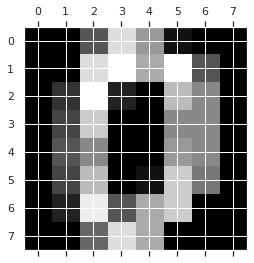

In [0]:
plt.matshow(digits.data[0].reshape(8,8),cmap = plt.cm.gray)
plt.show()

In [0]:
digits.target[0]

0

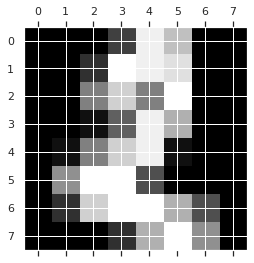

In [0]:
plt.matshow(digits.data[2].reshape(8,8), cmap = plt.cm.gray)

In [0]:
digits.target[2]

2

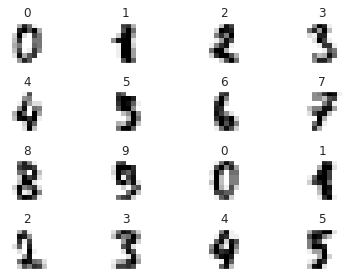

In [0]:
fig, axes = plt.subplots(4,4)
for x,y,ax in zip(digits.data, digits.target,axes.ravel()):
  ax.set_title(y)
  ax.imshow(x.reshape(8,8),cmap='gray_r')
  ax.set_xticks(())
  ax.set_yticks(())
plt.tight_layout()

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(digits.data,digits.target, test_size = .25)


In [0]:
# loading another dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
iris.data.shape

(150, 4)

In [0]:
iris.target.shape

(150,)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target,test_size = .25)

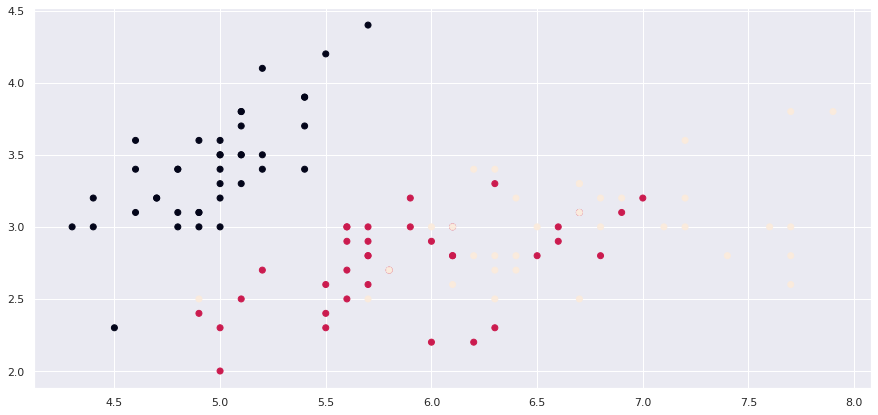

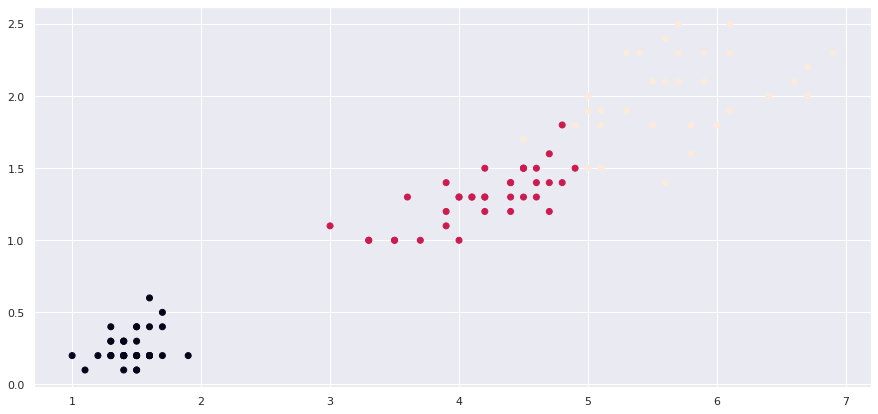

In [0]:
plt.figure(figsize=(15,7))
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.figure(figsize=(15,7))
plt.scatter(X_train[:,2],X_train[:,3], c=y_train)

** Let's see another way to load the data as csv**

In [0]:
import sklearn.datasets
import os
iris_path = os.path.join(sklearn.datasets.__path__[0],'data', 'iris.csv')

**Let have a look at the descrption of the iris dataset**

In [0]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
df = pd.read_csv(iris_path,header=None, skiprows=1)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
X = df.iloc[:]
y=df.loc[:,:4]

In [0]:
print(X.shape)
print()
print(y.shape)

(150, 5)

(150, 5)


Let use support vector machine to train our model again and see what will give

In [0]:
digits = load_digits()

In [0]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [0]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [0]:
X = digits.data
y = digits.target

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)

In [0]:
X_train.shape

(1347, 64)

Import the model

In [0]:
from sklearn.svm import LinearSVC

In [0]:
svm  = LinearSVC()

In [0]:
svm.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred = svm.predict(X_train)

In [0]:
print(y_train)

[2 8 9 ... 7 7 8]


In [0]:
svm.score(X_train,y_train)

0.994060876020787

Another algorithm Random Forest classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
rf = RandomForestClassifier(n_estimators=50,random_state=0)

In [0]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
rf.score(X_test,y_test)

0.9511111111111111

Another algorithm KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
X = iris.data
y=iris.target
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y)

knn = KNeighborsClassifier(n_neighbors=3)

In [0]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
knn.score(X_test,y_test)

0.9210526315789473

Let's load the cancer dataset from sklearn

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [0]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
# to see the description of my dataset 
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = cancer.data
y = cancer.target
X_train, X_test ,y_train,y_test = train_test_split(X,y,random_state =0, test_size =.25)

In [0]:
X_train.shape

(426, 30)

In [0]:
X_test.shape

(143, 30)

In [0]:
# importing th algorithm
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)

In [0]:
# training the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(X_test)

In [0]:
knn.score(X_test,y_test)

0.9230769230769231

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0, test_size=0.25,)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


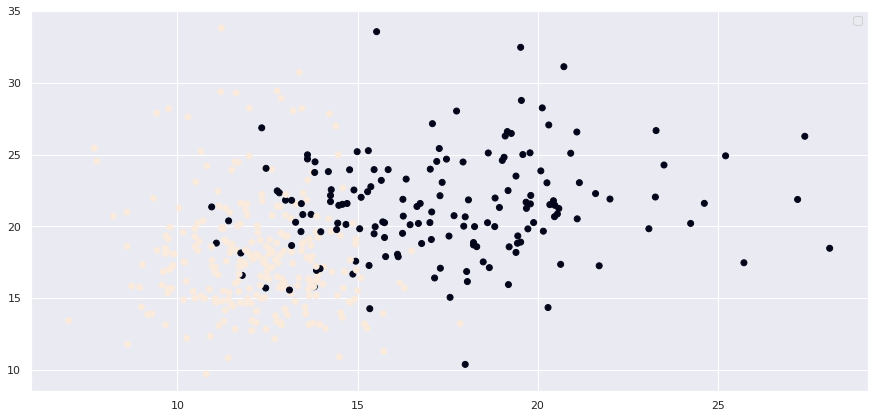

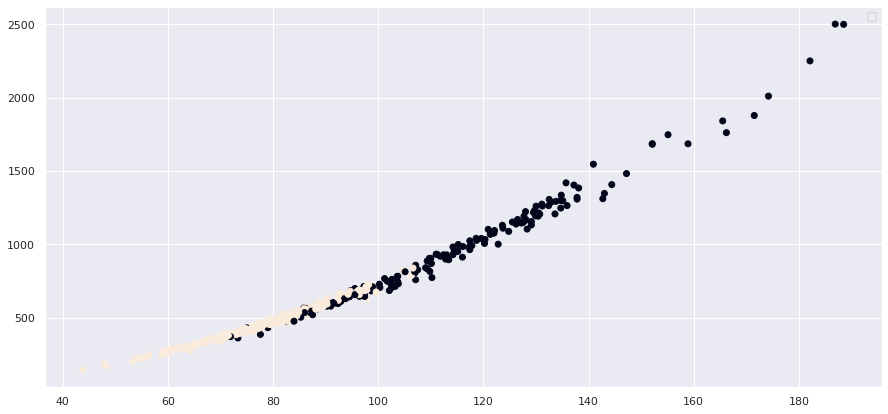

In [0]:
plt.figure(figsize=(15,7))
plt.scatter(X_train[:,0], X_train[:,1], c = y_train,)
plt.legend()
plt.figure(figsize=(15,7))
plt.scatter(X_train[:,2],X_train[:,3], c=y_train,)
plt.legend()
plt.show()

In [0]:
rfl = RandomForestClassifier()

In [0]:
rfl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfl.score(X_test,y_test)

0.965034965034965

In [0]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


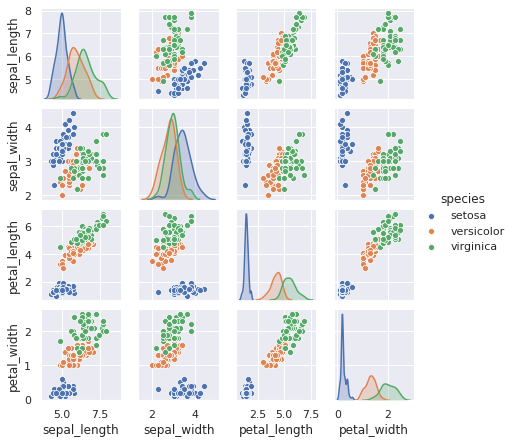

In [0]:
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [0]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [0]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-05-18 12:50:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.1s    

2020-05-18 12:50:16 (242 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [0]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv')

In [0]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [0]:
from sklearn.preprocessing import StandardScaler
X2 = df.drop('custcat',axis=1)
y2 = df['custcat']

X2 = StandardScaler().fit(X).transform(X2.astype(float))
X2[0:5]


array([[2.00000000e+00, 1.30000000e+01, 4.40000000e+01, 1.00000000e+00,
        9.00000000e+00, 6.40000000e+01, 4.00000000e+00, 5.00000000e+00,
        8.88178420e-18, 7.10542736e-17, 2.00000000e+00],
       [3.00000000e+00, 1.10000000e+01, 3.30000000e+01, 1.00000000e+00,
        7.00000000e+00, 1.36000000e+02, 5.00000000e+00, 5.00000000e+00,
        8.88178420e-18, 7.10542736e-17, 6.00000000e+00],
       [3.00000000e+00, 6.80000000e+01, 5.20000000e+01, 1.00000000e+00,
        2.40000000e+01, 1.16000000e+02, 1.00000000e+00, 2.90000000e+01,
        8.88178420e-18, 1.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 3.30000000e+01, 3.30000000e+01, 2.66453526e-18,
        1.20000000e+01, 3.30000000e+01, 2.00000000e+00, 1.42108547e-17,
        8.88178420e-18, 1.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 3.00000000e+01, 1.00000000e+00,
        9.00000000e+00, 3.00000000e+01, 1.00000000e+00, 2.00000000e+00,
        8.88178420e-18, 7.10542736e-17, 4.00000000e+

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2)

In [0]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
yhat = knn1.predict(X_test)
yhat

array([1, 1, 4, 1, 3, 4, 1, 1, 4, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 4, 4, 4,
       3, 1, 3, 2, 1, 4, 1, 1, 3, 1, 1, 1, 3, 4, 2, 2, 3, 4, 3, 2, 3, 2,
       3, 3, 1, 3, 1, 3, 2, 1, 1, 2, 1, 1, 1, 4, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 3, 4, 1, 4, 4, 3, 2, 1, 3, 1, 1, 1, 1, 3, 3, 4, 3, 1, 3, 4,
       1, 1, 4, 1, 3, 4, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 2, 3, 4, 1, 1, 1,
       4, 1, 2, 1, 1, 1, 4, 2, 1, 3, 3, 2, 4, 1, 3, 1, 3, 3, 3, 3, 2, 3,
       4, 3, 4, 2, 1, 1, 1, 2, 1, 2, 3, 4, 4, 2, 3, 1, 3, 3, 3, 1, 3, 2,
       1, 4, 1, 2, 2, 2, 1, 4, 1, 4, 1, 1, 1, 1, 3, 3, 4, 2, 4, 1, 2, 4,
       1, 1, 2, 1, 3, 1, 3, 4, 1, 1, 3, 4, 3, 4, 3, 2, 1, 1, 4, 1, 4, 1,
       2, 1, 1, 2, 1, 4, 1, 2, 4, 3, 3, 2, 4, 3, 1, 4, 4, 1, 2, 1, 1, 1,
       2, 4, 1, 3, 3, 2, 1, 4, 2, 4, 1, 3, 1, 1, 1, 2, 4, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 3, 1, 1, 4])

In [0]:
knn1.score(X_test,y_test)

0.292

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yhat)

0.292